# 1. Problem

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist_data/", one_hot=False)

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz


# 2. Neural Network
![](images/neural_network.jpeg)

# 3. Train

In [2]:
# Parameters
learning_rate = 0.1
num_steps = 2000
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256          # 1st layer number of neurons
n_hidden_2 = 256          # 2nd layer number of neurons
num_input = 784           # MNIST data input (img shape: 28*28)
num_classes = 10          # MNIST total classes (0-9 digits)

# Define the input function for training


In [3]:
# Define the model function (following TF Estimator Template)
def model_fn(features, labels, mode):
    x = features['images']
    layer_1 = tf.layers.dense(x, n_hidden_1)
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    logits = tf.layers.dense(layer_2, num_classes)

    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    # TF Estimators requires to return a EstimatorSpec, that specify
    # the different ops for training, evaluating, ...
    return tf.estimator.EstimatorSpec(
        mode=mode, predictions=pred_classes, loss=loss_op, 
        train_op=train_op, eval_metric_ops={'accuracy': acc_op})

In [4]:
model = tf.estimator.Estimator(model_fn)
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6p/yqt9w6sx0330_s_nfp4gzzm40000gn/T/tmp42i8jpz4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x119d5db70>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/6p/yqt9w6sx0330_s_nfp4gzzm40000gn/T/tmp42i8jpz4/model.ckpt.
INFO:tensorflow:loss = 2.65213, step = 1
INFO:tensorflow:global_step/sec: 309.021
INFO:tensorflow:loss = 0.641271, step = 101 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.074
INFO:tensorflow:loss = 0.262502, step 

# 4. Evaluate

In [5]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-07-07-03:10:02
INFO:tensorflow:Restoring parameters from /var/folders/6p/yqt9w6sx0330_s_nfp4gzzm40000gn/T/tmp42i8jpz4/model.ckpt-2000
INFO:tensorflow:Finished evaluation at 2018-07-07-03:10:02
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9193, global_step = 2000, loss = 0.270117


{'accuracy': 0.91930002, 'global_step': 2000, 'loss': 0.27011731}

INFO:tensorflow:Restoring parameters from /var/folders/6p/yqt9w6sx0330_s_nfp4gzzm40000gn/T/tmp42i8jpz4/model.ckpt-2000


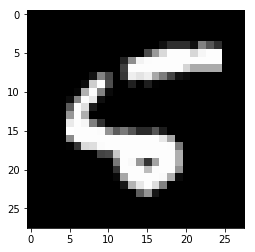

Label:  5      Model prediction: 6


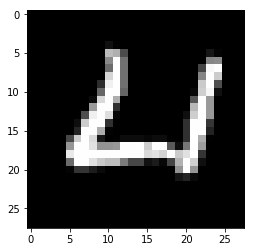

Label:  4      Model prediction: 6


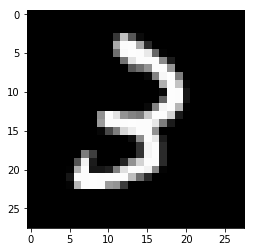

Label:  3      Model prediction: 2


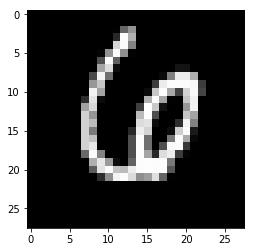

Label:  6      Model prediction: 7


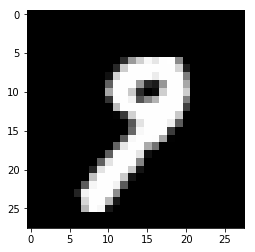

Label:  9      Model prediction: 7


In [7]:
import matplotlib.pyplot as plt
import numpy as np

input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': mnist.test.images}, shuffle=False)
preds = np.asarray(list(model.predict(input_fn)))
error_pred = np.not_equal(preds, mnist.test.labels)
error_images = mnist.test.images[error_pred]
error_labels = mnist.test.labels[error_pred]
error_p = preds[error_pred]

for i in range(5):
    plt.imshow(np.reshape(error_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Label: ", error_labels[i], "     Model prediction:", error_p[i])